In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nsharan/h-1b-visa

100% 94.8M/94.8M [00:00<00:00, 151MB/s]
100% 94.8M/94.8M [00:00<00:00, 130MB/s]


In [ ]:
!unzip h-1b-visa.zip

Archive:  h-1b-visa.zip
  inflating: h1b_kaggle.csv          


In [ ]:
# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2023-04-04 06:49:17--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]     183  --.-KB/s    in 0s      

2023-04-04 06:49:17 (10.9 MB/s) - ‘requirements.txt.1’ saved [183/183]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_csv("h1b_kaggle.csv")
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [ ]:
df=df.sample(frac = 1)

In [ ]:
df = df.head(10000)
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1850053,1850054,CERTIFIED,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,Computer Systems Analysts,MANAGER JC50,Y,92206.0,2013.0,"TEANECK, NEW JERSEY",-74.011654,40.893247
1202051,1202052,CERTIFIED-WITHDRAWN,NEW YORK UNIVERSITY,"POLITICAL SCIENCE TEACHERS, POSTSECONDARY",ASSISTANT PROFESSOR/FACULTY FELLOW,Y,38730.0,2015.0,"NEW YORK, NEW YORK",-74.005941,40.712784
256307,256308,CERTIFIED,"ADALISOFT, INC.",COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,N,45011.0,2016.0,"IRVING, TEXAS",-96.948894,32.814018
2703666,2703667,CERTIFIED,MAKRO TECHNOLOGIES INC,Computer Programmers,COMPUTER PROGRAMMER,Y,76793.6,2011.0,"GROTON, CONNECTICUT",-72.079072,41.349746
2381440,2381441,CERTIFIED,FOUGERA PHARMACEUTICALS INC.,"Medical Scientists, Except Epidemiologists","SCIENTIST, PHARMACEUTICAL TECHNICAL OPERATIONS",Y,64979.0,2012.0,"MELVILLE, NEW YORK",-73.415121,40.793432
...,...,...,...,...,...,...,...,...,...,...,...
685279,685280,CERTIFIED,"COGENT HEALTHCARE OF ILLINOIS, LLC","PHYSICIANS AND SURGEONS, ALL OTHER",HOSPITALIST PHYSICIAN,Y,123281.6,2015.0,"NORMAL, ILLINOIS",-88.990631,40.514203
2222065,2222066,CERTIFIED-WITHDRAWN,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",Computer and Information Research Scientists,POSTDOCTORAL RESEARCH ASSOCIATE IN FUTURE TECH...,Y,47819.0,2013.0,"OAK RIDGE, TENNESSEE",-84.269645,36.010356
676130,676131,CERTIFIED,ACCENTURE LLP,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER/CONFIGURER 2,Y,97115.0,2015.0,"ISSAQUAH, WASHINGTON",-122.032619,47.530101
1412936,1412937,DENIED,MOTOROLA MOBILITY LLC,Architectural and Engineering Managers,PROJECT MANAGER,Y,134856.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830


## PRE-PROCESSING

In [ ]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
top_emp

['INFOSYS LIMITED',
 'TATA CONSULTANCY SERVICES LIMITED',
 'IBM INDIA PRIVATE LIMITED',
 'ACCENTURE LLP',
 'WIPRO LIMITED',
 'CAPGEMINI AMERICA INC',
 'DELOITTE CONSULTING LLP',
 'ERNST & YOUNG U.S. LLP',
 'MICROSOFT CORPORATION',
 'GOOGLE INC.']

In [ ]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

In [ ]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

<ipython-input-7-443ca6b8ad20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])


In [ ]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1850053,1850054,CERTIFIED,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,Computer Systems Analysts,MANAGER JC50,Y,92206.0,2013.0,"TEANECK, NEW JERSEY",-74.011654,40.893247
1202051,1202052,CERTIFIED-WITHDRAWN,NEW YORK UNIVERSITY,"POLITICAL SCIENCE TEACHERS, POSTSECONDARY",ASSISTANT PROFESSOR/FACULTY FELLOW,Y,38730.0,2015.0,"NEW YORK, NEW YORK",-74.005941,40.712784
256307,256308,CERTIFIED,"ADALISOFT, INC.",COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,N,45011.0,2016.0,"IRVING, TEXAS",-96.948894,32.814018
2703666,2703667,CERTIFIED,MAKRO TECHNOLOGIES INC,Computer Programmers,COMPUTER PROGRAMMER,Y,76793.6,2011.0,"GROTON, CONNECTICUT",-72.079072,41.349746
2381440,2381441,CERTIFIED,FOUGERA PHARMACEUTICALS INC.,"Medical Scientists, Except Epidemiologists","SCIENTIST, PHARMACEUTICAL TECHNICAL OPERATIONS",Y,64979.0,2012.0,"MELVILLE, NEW YORK",-73.415121,40.793432
...,...,...,...,...,...,...,...,...,...,...,...
685279,685280,CERTIFIED,"COGENT HEALTHCARE OF ILLINOIS, LLC","PHYSICIANS AND SURGEONS, ALL OTHER",HOSPITALIST PHYSICIAN,Y,123281.6,2015.0,"NORMAL, ILLINOIS",-88.990631,40.514203
2222065,2222066,CERTIFIED-WITHDRAWN,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",Computer and Information Research Scientists,POSTDOCTORAL RESEARCH ASSOCIATE IN FUTURE TECH...,Y,47819.0,2013.0,"OAK RIDGE, TENNESSEE",-84.269645,36.010356
676130,676131,CERTIFIED,ACCENTURE LLP,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER/CONFIGURER 2,Y,97115.0,2015.0,"ISSAQUAH, WASHINGTON",-122.032619,47.530101
1412936,1412937,DENIED,MOTOROLA MOBILITY LLC,Architectural and Engineering Managers,PROJECT MANAGER,Y,134856.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830


In [ ]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3, 
                                           'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4, 'REJECTED' : 5, 'INVALIDATED' : 6})

<ipython-input-9-8b22dfd5a89d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3,


In [ ]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})

<ipython-input-10-4449b2ba6280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})


In [ ]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer|software',case=False)] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief|management',case=False)] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical',case=False)] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database|Analyst',case=False)] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales|market',case=False)] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial',case=False)] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public|fundraising',case=False)] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education|law',case=False)] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors|compliance',case=False)] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution|logistics',case=False)] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters|human',case=False)] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural|farm',case=False)] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction|architectural',case=False)] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic|health',case=False)] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers',case=False)] = 'education'

<ipython-input-11-568e7a368531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'] = 'others'
<ipython-input-11-568e7a368531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer|software',case=False)] = 'it'
<ipython-input-11-568e7a368531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME

In [ ]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [ ]:
df = df.drop(['SOC_NAME1'], axis=1)

## APPLYING TABULAR GANS

In [ ]:
# HIDE OUTPUT
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics



COLS_USED = ['CASE_STATUS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR',
       'SOC_N']
COLS_TRAIN = ['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR',
       'SOC_N']

df = df[COLS_USED]

# Split into training and test sets
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df.drop("CASE_STATUS", axis=1),
    df["CASE_STATUS"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values


In [ ]:
# Build the neural network
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

Epoch 1/1000
250/250 - 4s - loss: 1108869.1250 - val_loss: 5989.3931 - 4s/epoch - 17ms/step
Epoch 2/1000
250/250 - 2s - loss: 4836.1084 - val_loss: 4220.8486 - 2s/epoch - 6ms/step
Epoch 3/1000
250/250 - 2s - loss: 3286.5107 - val_loss: 2938.4939 - 2s/epoch - 7ms/step
Epoch 4/1000
250/250 - 2s - loss: 1860.7419 - val_loss: 1443.0402 - 2s/epoch - 7ms/step
Epoch 5/1000
250/250 - 2s - loss: 966.3812 - val_loss: 660.3069 - 2s/epoch - 6ms/step
Epoch 6/1000
250/250 - 1s - loss: 417.2041 - val_loss: 266.0686 - 1s/epoch - 6ms/step
Epoch 7/1000
250/250 - 2s - loss: 182.4713 - val_loss: 125.6804 - 2s/epoch - 7ms/step
Epoch 8/1000
250/250 - 1s - loss: 54.4471 - val_loss: 31.1705 - 1s/epoch - 5ms/step
Epoch 9/1000
250/250 - 1s - loss: 16.9839 - val_loss: 7.4403 - 795ms/epoch - 3ms/step
Epoch 10/1000
250/250 - 1s - loss: 4.6554 - val_loss: 2.6037 - 877ms/epoch - 4ms/step
Epoch 11/1000
250/250 - 1s - loss: 2.3374 - val_loss: 1.5921 - 782ms/epoch - 3ms/step
Epoch 12/1000
250/250 - 1s - loss: 1.6336 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,850
Trainable params: 1,850
Non-trainable params: 0
_________________________________________________________________


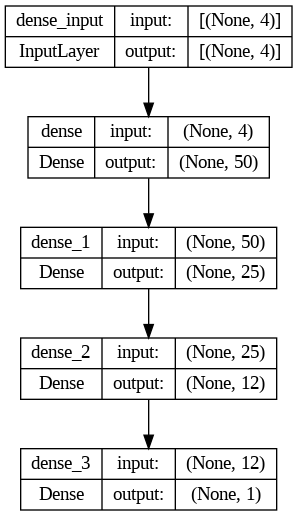

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score: {}".format(score))

63/63 [==============================] - 0s 2ms/step
Final score: 1.0607558087331188


In [ ]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)



/usr/local/lib/python3.9/dist-packages/_ctgan/synthesizer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Fitting CTGAN transformers for each column:   0%|          | 0/5 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat

In [ ]:
gen_x['YEAR'] = gen_x['YEAR'].round(decimals = 0)


In [ ]:
gen_x.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,0,174152.509617,2012.0,2
1,0,148966.752939,2012.0,2
2,0,171603.975017,2012.0,2
3,0,163984.045412,2012.0,2
4,0,179405.353601,2012.0,0


In [ ]:
# Predict
pred = model.predict(gen_x.values)
score = np.sqrt(metrics.mean_squared_error(pred,gen_y.values))
print("Final score : {}".format(score))

583/583 [==============================] - 1s 2ms/step
Final score : 1.5759845612951957


In [ ]:
frames = [df.drop(['CASE_STATUS'],axis=1), gen_x]
new_x = pd.concat(frames)
frames = [df['CASE_STATUS'], gen_y]
new_y = pd.concat(frames)

## CLASSIFICATION ALGORITHMS BEFORE GANS

In [ ]:
from sklearn.model_selection import train_test_split
x_train0, x_test0, y_train0, y_test0 = train_test_split(df.drop(['CASE_STATUS'],axis=1), df['CASE_STATUS'], test_size=0.25, random_state=0)

> Logistic Regression (ORIGINAL DATA)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train0, y_train0)
score = logisticRegr.score(x_test0, y_test0)
print("ACCURACY: "+str(score))

ACCURACY: 0.8718975180144115


> Random Forest (ORIGINAL DATA)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
clf.fit(x_train0, y_train0)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test0)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test0, y_pred))


ACCURACY OF THE MODEL:  0.8050440352281826


> K Nearest Neighbors (ORIGINAL DATA)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train0, y_train0)
y_pred  =knn.predict(x_test0)
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test0, y_pred))


ACCURACY OF THE MODEL:  0.858343337334934


> Gradient Boosting Ensemble (ORIGINAL DATA)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train0, y_train0)
clf.score(x_test0, y_test0)

0.8787515006002401

## CLASSIFICATION ALGORITHMS AFTER GANS

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_x, new_y, test_size=0.25, random_state=0)

> Logistic Regression (GAN Synthesized data)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train1, y_train1)
score = logisticRegr.score(x_test1, y_test1)
print("ACCURACY: "+str(score))

ACCURACY: 0.7381271800375637


> RandomForest (GAN Synthesized data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
clf.fit(x_train1, y_train1)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test1)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test1, y_pred))


ACCURACY OF THE MODEL:  0.7000268312315535


> K Nearest Neighbors (GAN Synthesised Data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train1, y_train1)
y_pred  =knn.predict(x_test1)
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test1, y_pred))

ACCURACY OF THE MODEL: 0.7147449336128582


> Gradient Boosting Ensemble (GAN Synthesised Data)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train1, y_train1)
clf.score(x_test1, y_test1)

0.7132075471698113

### reshaping it into 25x100 images for noise to feed it into generator network in GAN

In [ ]:
before_img = pd.concat([gen_x,gen_y],axis=1).values

In [ ]:
before_img.shape

(19826, 5)

In [ ]:
import math
before_img = np.reshape(before_img,(1,-1))[0][:2500*math.floor(before_img.shape[0]*before_img.shape[1]/2500)]

In [ ]:
before_img=np.reshape(before_img,(-1,25,100))

In [ ]:
before_img.shape

(39, 25, 100)

In [ ]:
from scipy import stats
before_img = stats.zscore(before_img)

#before_img = (before_img/np.linalg.norm(before_img))

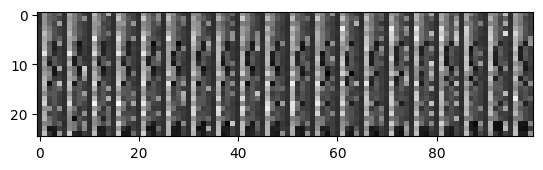

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(before_img[0], cmap='gray')
plt.show()

### GANs for Images

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Define input image dimensions
#Large images take too much time and resources.
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [ ]:
def build_generator():

    noise_shape = (100,) #1D array of size 100 (latent vector / noise)

#Define your generator network 
#Here we are only using Dense layers. But network can be complicated based
#on the application. For example, you can use VGG for super res. GAN.         

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    #Generated image

    return Model(noise, img)

In [ ]:
def build_discriminator():


    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [ ]:
def save_imgs(epoch):
    r, c = 5, 5
    #noise = np.random.normal(0, 1, (r * c, 100))
    noise = before_img[0]
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/mnist_%d.png" % epoch)
    plt.close()
#This function saves images to view

In [ ]:

optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.


discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
 
z = Input(shape=(100,))   
img = generator(z)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-tr

In [ ]:
discriminator.trainable = False  

  
valid = discriminator(img)  

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


In [ ]:
def train(epochs, batch_size=128, save_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Convert to float and Rescale -1 to 1 
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5

#Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
    X_train = np.expand_dims(X_train, axis=3) 

    half_batch = int(batch_size / 2)


    for epoch in range(epochs):

        # TRAIN DISCRIMINATOR
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

 
        noise = np.random.normal(0, 1, (half_batch, 100))

        gen_imgs = generator.predict(noise)

        # Train the discriminator on real and fake images, separately
        #Research showed that separate training is more effective. 
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    #take average loss from real and fake images. 
    
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 

        # TRAIN GENERATOR
        noise = np.random.normal(0, 1, (batch_size, 100)) 
        valid_y = np.array([1] * batch_size) 

        g_loss = combined.train_on_batch(noise, valid_y)

        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        if epoch % save_interval == 0:
            save_imgs(epoch)

create images/ folder before running 

In [ ]:
train(epochs=5000, batch_size=32, save_interval=500)

generator.save('generator_model.h5')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
2502 [D loss: 0.562326, acc.: 75.00%] [G loss: 0.965783]
1/1 [==============================] - 0s 25ms/step
2503 [D loss: 0.577355, acc.: 65.62%] [G loss: 1.002471]
1/1 [==============================] - 0s 31ms/step
2504 [D loss: 0.625917, acc.: 53.12%] [G loss: 0.906733]
1/1 [==============================] - 0s 27ms/step
2505 [D loss: 0.552099, acc.: 75.00%] [G loss: 0.939006]
1/1 [==============================] - 0s 28ms/step
2506 [D loss: 0.689081, acc.: 56.25%] [G loss: 0.871612]
1/1 [==============================] - 0s 29ms/step
2507 [D loss: 0.572946, acc.: 71.88%] [G loss: 0.923404]
1/1 [==============================] - 0s 28ms/step
2508 [D loss: 0.671703, acc.: 62.50%] [G loss: 0.968615]
1/1 [==============================] - 0s 25ms/step
2509 [D loss: 0.585679, acc.: 78.12%] [G loss: 0.888256]
1/1 [==============================] - 0s 30ms/step
2510 [D loss: 0.500231, a

> the images/ folder shows the images generated by GANs after every 500 epochs

#### generate images now!

In [ ]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn

# load model
model = load_model('generator_model.h5')

1/1 [==============================] - 0s 43ms/step


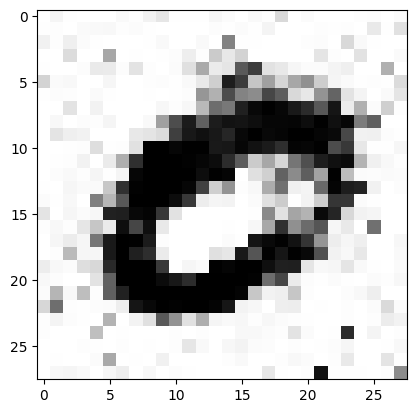

In [ ]:
#To create random images each time...
vector = randn(100) #Vector of random numbers (creates a column, need to reshape)
vector = vector.reshape(1, 100)

# generate image
X = model.predict(vector)

# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

In [ ]:
!zip -r /content/imagesGAN.zip /content/images